In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [3]:
np.random.seed(15)
data =  np.array([0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0]).reshape(5,5)
xs = np.c_[np.ones([data.shape[0]]), data] 
xs

array([[1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [4]:
ys = np.array([0, 0, 0, 3, 3])
ys.resize(5,1)
ys

array([[0],
       [0],
       [0],
       [3],
       [3]])

In [5]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [42]:
ins = 5
outs = 1
nodes = 15

wi = weights(ins+1, nodes)
ws = weights(nodes, outs) 
err = []

In [46]:
for i in range(5000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = yh - ys           
    e = np.sum(np.abs(e)) 
    if e < 0.05:
        print('we have converged after {} iterations'.format(i))
        print(ws)
        break
    else: 
        mutation = weights(nodes, outs)*0.04
        cw = ws + mutation
        
        x = xs @ wi
        x = np.sin(x)
        yh = x @ cw
        ce = yh - ys
        ce = np.sum(np.abs(ce))
        if ce < e:
            ws = cw
            err.append(e)

we have converged after 366 iterations
[[-2.58640526]
 [-1.55927989]
 [-0.65737908]
 [ 0.90098038]
 [-2.09860616]
 [ 0.12483333]
 [-1.41538364]
 [-1.55743463]
 [ 0.55306503]
 [-1.69991469]
 [ 0.14592960]
 [-0.08864829]
 [-0.73248695]
 [-0.75391841]
 [ 0.60388328]]


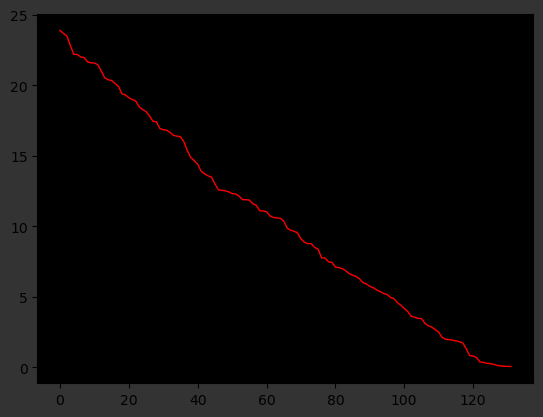

In [49]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [50]:
len(err), min(err)

(132, 0.06784311852998676)

In [51]:
np.set_printoptions(suppress=True, floatmode='fixed')
#np.set_printoptions(suppress=True, floatmode='unique')

In [52]:
print(ys)
print(yh)

[[0]
 [0]
 [0]
 [3]
 [3]]
[[-0.00155365]
 [ 0.00547612]
 [ 0.00240571]
 [ 3.00857744]
 [ 2.97265824]]


In [53]:
x = xs[3] @ wi
x = np.sin(x)
solution_ = x @ ws
solution_, ys[3] #see what happend?

(array([3.00857744]), array([3]))